<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/Compute_Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import os                                               # to set current working directory
import sys                                              # supress output to screen for interactive variogram modeling
import io
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
from sklearn.cluster import KMeans                      # k-means clustering
from sklearn.datasets import make_blobs                 # random blob generator

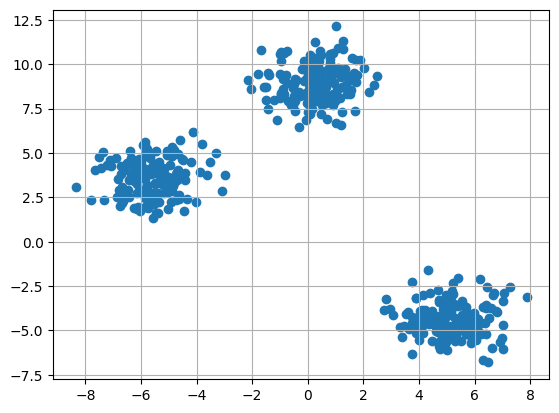

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])

In [18]:
#Defining our function
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids
    centroids = x[idx, :] #Step 1

    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2

    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3

    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids

        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    return points, centroids

In [19]:
np.random.choice(len(X), 3,replace=False)

array([228,  87,  59])

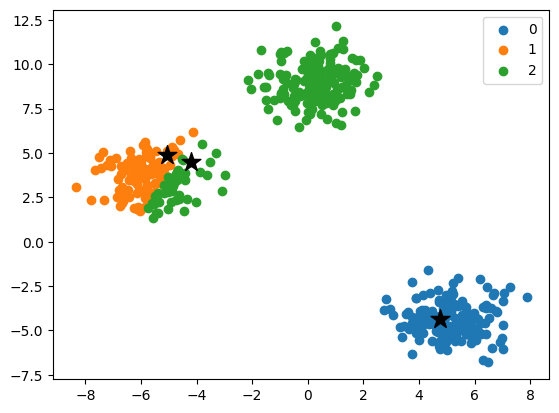

In [22]:
#Applying our function
label, centroids = kmeans(X,3,0)

#Visualize the results

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
    plt.scatter(centroids[i,0], centroids[i,1], marker='*', s=200, c='black')
plt.legend()
plt.show()

In [3]:
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
#Load Data
data = load_digits().data
data.shape

(1797, 64)

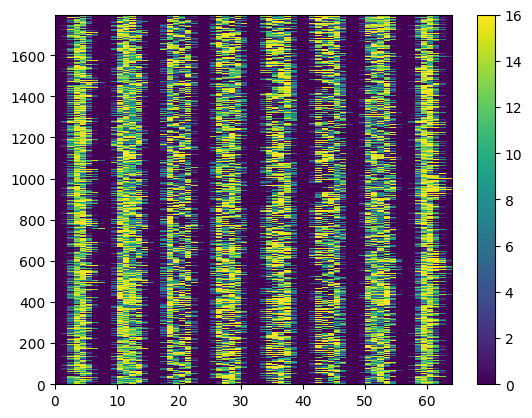

In [5]:
plt.pcolormesh(data);plt.colorbar()

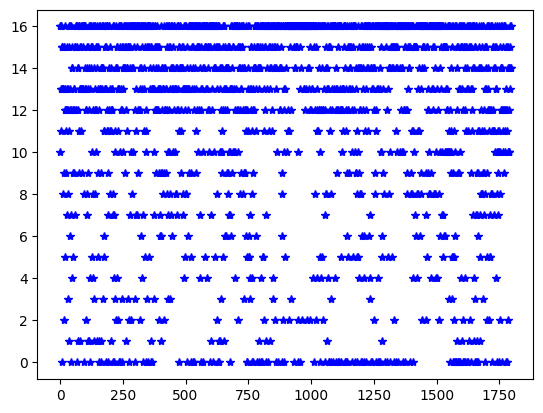

In [ ]:
plt.plot(data[:,60],'b*')

In [ ]:
pca = PCA(2)
#Transform the data
df = pca.fit_transform(data)
df.shape

(1797, 2)

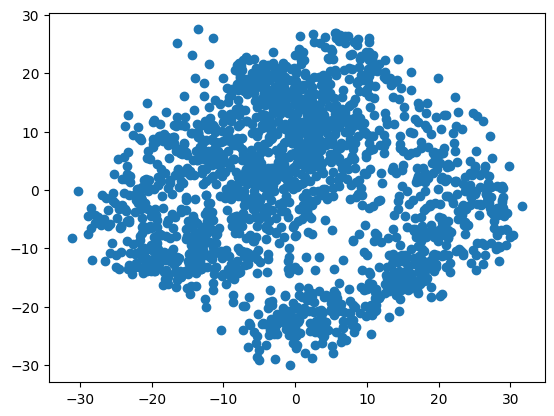

In [ ]:
plt.scatter(df[:,0],df[:,1])

In [6]:
#Defining our function
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids
    centroids = x[idx, :] #Step 1

    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2

    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3

    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids

        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    return points, centroids

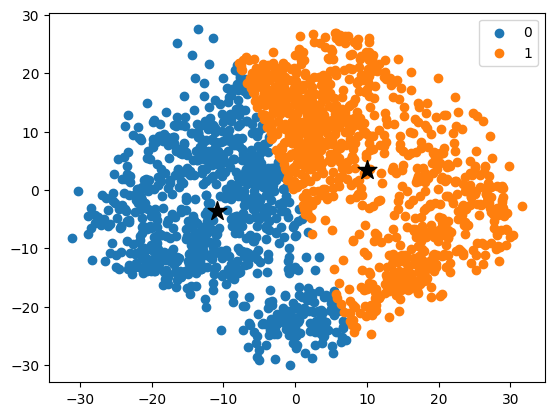

In [ ]:
#Applying our function
label, centroids = kmeans(df,2,1)

#Visualize the results

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(centroids[i,0], centroids[i,1], marker='*', s=200, c='black')
plt.legend()
plt.show()

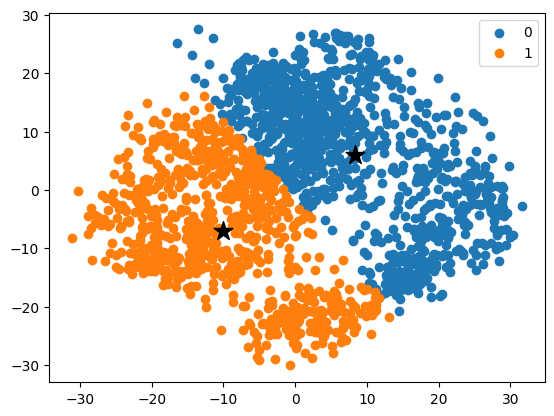

In [ ]:
#Applying our function
label, centroids = kmeans(df,2,100)

#Visualize the results

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(centroids[i,0], centroids[i,1], marker='*', s=200, c='black')
plt.legend()
plt.show()

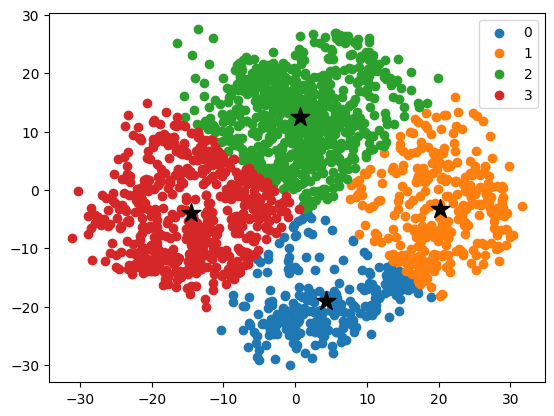

In [ ]:
#Applying our function
label, centroids = kmeans(df,4,100)

#Visualize the results

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(centroids[i,0], centroids[i,1], marker='*', s=200, c='black')
plt.legend()
plt.show()

In [ ]:
centroids

array([[  4.26620411, -18.97534594],
       [ 20.18856758,  -3.30635098],
       [  0.71233071,  12.47791879],
       [-14.50644262,  -3.91915002]])

In [ ]:
KM = KMeans(n_clusters=4)
model = KM.fit(df)
model.cluster_centers_

array([[-14.46900539,  -3.8181101 ],
       [ 20.182542  ,  -3.43889725],
       [  0.79432875,  12.51617158],
       [  4.10246606, -18.99616078]])

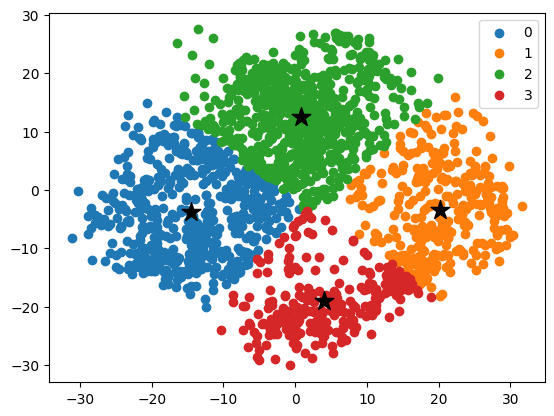

In [ ]:
model.labels_
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(df[model.labels_ == i , 0] , df[model.labels_ == i , 1] , label = i)
    plt.scatter(model.cluster_centers_[i,0], model.cluster_centers_[i,1], marker='*', s=200, c='black')
plt.legend()
plt.show()


In [23]:
!pip install zarr
!pip install gcsfs
!pip install netcdf4
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.9/203.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.0 MB/s eta 0:00:00


In [24]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


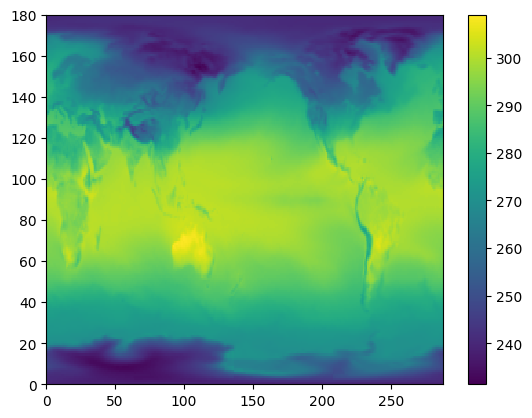

In [25]:
import xarray as xr
dd = df[(df.experiment_id == 'historical') & (df.institution_id == 'NOAA-GFDL') & (df.table_id == 'Amon') & (df.grid_label=='gr1') & (df.source_id == 'GFDL-ESM4') & (df.member_id == 'r1i1p1f1') & (df.variable_id == 'tas')]
ds1 = xr.open_zarr(
dd.zstore.iloc[0],
storage_options={'token': 'anon'},
consolidated=True,decode_times=False
)
plt.pcolormesh(ds1.tas[-1,:,:]);plt.colorbar()

In [26]:
ds1

<xarray.Dataset> Size: 411MB
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 1980)
Coordinates:
  * bnds       (bnds) float64 16B 1.0 2.0
    height     float64 8B ...
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) int64 16kB 0 708 1416 2148 ... 1443192 1443924 1444656
    time_bnds  (time, bnds) float64 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Data variables:
    tas        (time, lat, lon) float32 411MB dask.array<chunksize=(600, 180, 288), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/75e5c5a7-d7c4-4860-beb1-db454f25f13a...
    variable_id:            tas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-09-10;created;by nhn2@columbia.edu

In [27]:
df = ds1.tas[:,90:,:]
time = pd.date_range("1850-01-01", freq="M", periods=1980)
df['time'] = time
df

<ipython-input-27-d15a4cd1cb08>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time = pd.date_range("1850-01-01", freq="M", periods=1980)


<xarray.DataArray 'tas' (time: 1980, lat: 90, lon: 288)> Size: 205MB
dask.array<getitem, shape=(1980, 90, 288), dtype=float32, chunksize=(600, 90, 288), chunktype=numpy.ndarray>
Coordinates:
    height   float64 8B ...
  * lat      (lat) float64 720B 0.5 1.5 2.5 3.5 4.5 ... 85.5 86.5 87.5 88.5 89.5
  * lon      (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time     (time) datetime64[ns] 16kB 1850-01-31 1850-02-28 ... 2014-12-31
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [28]:
df = df.groupby('time.month').mean('time')
df.shape

(12, 90, 288)

In [29]:
df = df.stack(z=("lat", "lon"))

In [30]:
from sklearn.preprocessing import StandardScaler
# The main idea is to normalize/standardize i.e. μ = 0 and σ = 1 your features which are present in the dataset, individually, before applying any machine learning model.
X = StandardScaler().fit_transform(df.transpose()-273.15)
X.shape

(25920, 12)

In [31]:
KM = KMeans(n_clusters=10)
model = KM.fit(X)
centers = model.cluster_centers_
centers

array([[-7.1858501e-01, -7.5245011e-01, -7.8737253e-01, -8.4760725e-01,
        -9.8624724e-01, -1.1142683e+00, -1.0712854e+00, -9.9501002e-01,
        -8.8354754e-01, -7.1084672e-01, -6.4576101e-01, -6.7536891e-01],
       [ 7.5010854e-01,  7.2265601e-01,  6.7921507e-01,  6.2793094e-01,
         5.7196921e-01,  5.5134636e-01,  6.3156062e-01,  7.3677516e-01,
         7.8080261e-01,  7.7051967e-01,  7.6525235e-01,  7.6338172e-01],
       [ 3.6787409e-01,  3.3431214e-01,  2.6986170e-01,  1.5407482e-01,
        -2.2965215e-02, -1.3994926e-01, -6.4802900e-02,  6.9881447e-02,
         1.5887932e-01,  2.4293768e-01,  3.1370986e-01,  3.6086214e-01],
       [-1.3749461e+00, -1.4292107e+00, -1.5397333e+00, -1.5728625e+00,
        -1.4761744e+00, -1.4444442e+00, -1.5473135e+00, -1.5524784e+00,
        -1.4965031e+00, -1.5134786e+00, -1.4605429e+00, -1.3962519e+00],
       [ 6.5818143e-01,  7.5924540e-01,  9.0009248e-01,  1.0534873e+00,
         1.3006309e+00,  1.5553528e+00,  1.5749711e+00,  1.4

In [32]:
model.labels_.shape

(25920,)

In [33]:
x = np.reshape(model.labels_,[90,288])
x.shape

(90, 288)

In [34]:
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c','k','y','m','w','#FFFF00','#FF8C00','#FF8EFC']) #,'#962404'])#only 12 classes at present
bounds = np.arange(-0.5,11.5,1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

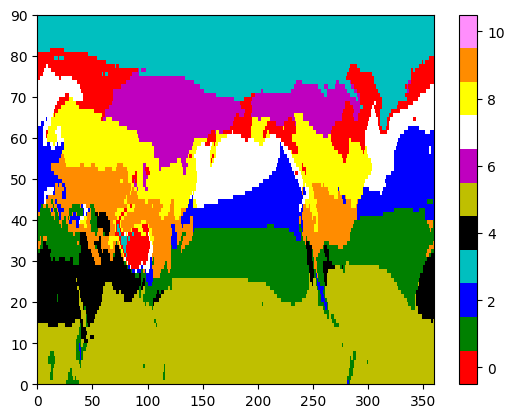

In [35]:
plt.pcolormesh(ds1.lon,ds1.lat[90:],x,cmap=cmap,vmin=-0.5,vmax=10.5);plt.colorbar()

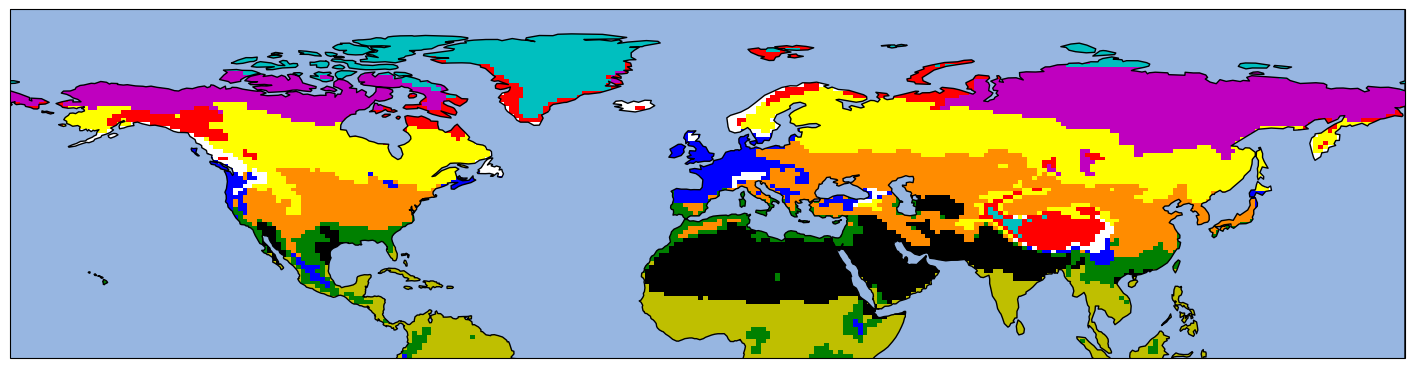

In [48]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.pcolormesh(ds1.lon,ds1.lat[90:],x,cmap=cmap,vmin=-0.5,vmax=10.5,
             transform=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN,zorder=1,edgecolor='black')